# LQ earnings vs LQ house price vs waiting List

In [225]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from dtw import dtw


In [169]:
waiting = pd.read_excel (r"Data/waiting_LQ_data.xlsx", sheet_name=0, skiprows = 1)
price = pd.read_excel (r"Data/waiting_LQ_data.xlsx", sheet_name=1, skiprows = 1)
earnings = pd.read_excel (r"Data/waiting_LQ_data.xlsx", sheet_name=2, skiprows = 1)
ratio = pd.read_excel (r"Data/waiting_LQ_data.xlsx", sheet_name=3, skiprows = 1)

waiting = waiting.drop(waiting.iloc[:,2:17], axis=1)

merged = pd.read_excel (r"Data/waiting_LQ_data.xlsx", sheet_name=4)
merged = merged.drop(merged.iloc[:, 0:1], axis=1)


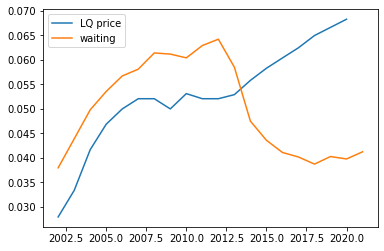

In [162]:
priceCol = list(price.iloc[0])[2:]
price_norm = [float(i)/sum(priceCol) for i in priceCol]
waitingCol = list(waiting.iloc[0])[2:]
waiting_norm = [float(i)/sum(waitingCol) for i in waitingCol]

plt.plot(list(price.columns)[2:], price_norm, label = "LQ price")
plt.plot(list(waiting.columns)[2:], waiting_norm, label = "waiting")
plt.legend()

Pandas computed Pearson r: -0.17580727993750206
Scipy computed Pearson r: -0.17580727993750167 and p-value: 0.4715629326578455


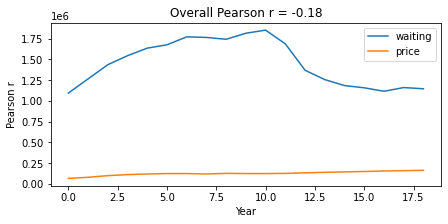

In [170]:
overall_pearson_r = merged.corr().iloc[0,1]
print(f"Pandas computed Pearson r: {overall_pearson_r}")
# out: Pandas computed Pearson r: 0.2058774513561943

r, p = stats.pearsonr(merged.dropna()['waiting'], merged.dropna()['price'])
print(f"Scipy computed Pearson r: {r} and p-value: {p}")
# out: Scipy computed Pearson r: 0.20587745135619354 and p-value: 3.7902989479463397e-51

# # Compute rolling window synchrony
f,ax=plt.subplots(figsize=(7,3))
merged.rolling(window=1,center=True).median().plot(ax=ax)
ax.set(xlabel='Year',ylabel='Pearson r')
ax.set(title=f"Overall Pearson r = {np.round(overall_pearson_r,2)}");



150.0


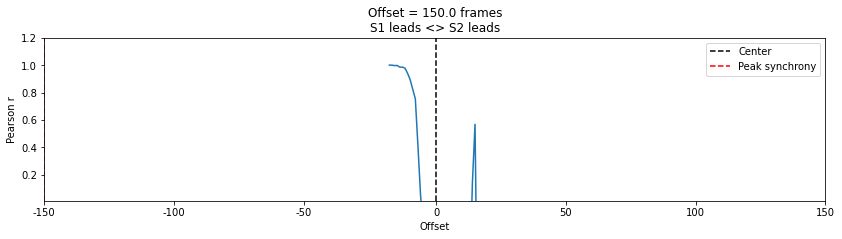

In [205]:
def crosscorr(datax, datay, lag=0, wrap=False):
    """ Lag-N cross correlation. 
    Shifted data filled with NaNs 
    
    Parameters
    ----------
    lag : int, default 0
    datax, datay : pandas.Series objects of equal length
    Returns
    ----------
    crosscorr : float
    """
    if wrap:
        shiftedy = datay.shift(lag)
        shiftedy.iloc[:lag] = datay.iloc[-lag:].values
        return datax.corr(shiftedy)
    else: 
        return datax.corr(datay.shift(lag))

d1 = merged['waiting']
d2 = merged['price']
seconds = 5
fps = 30
rs = [crosscorr(d1,d2, lag) for lag in range(-int(seconds*fps),int(seconds*fps+1))]
offset = np.floor(len(rs)/2)-np.argmax(rs)
print(offset)
f,ax=plt.subplots(figsize=(14,3))
ax.plot(rs)
ax.axvline(np.ceil(len(rs)/2),color='k',linestyle='--',label='Center')
ax.axvline(np.argmax(rs),color='r',linestyle='--',label='Peak synchrony')
ax.set(title=f'Offset = {offset} frames\nS1 leads <> S2 leads',ylim=[.01,1.2],xlim=[0,30], xlabel='Offset',ylabel='Pearson r')
ax.set_xticks([0, 50, 100, 151, 201, 251, 301])
ax.set_xticklabels([-150, -100, -50, 0, 50, 100, 150]);
plt.legend()

In [222]:

d1 = merged['waiting'].interpolate().values
d2 = merged['price'].interpolate().values
d, cost_matrix, acc_cost_matrix, path = dtw(d1,d2, dist='euclidean')

plt.imshow(acc_cost_matrix.T, origin='lower', cmap='gray', interpolation='nearest')
plt.plot(path[0], path[1], 'w')
plt.xlabel('Subject1')
plt.ylabel('Subject2')
plt.title(f'DTW Minimum Path with minimum distance: {np.round(d,2)}')
plt.show()

TypeError: dtw() got an unexpected keyword argument 'dist'